In [47]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/module-2/occupancy.csv')
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [49]:
df['date']

0        2/2/2015 14:00
1        2/2/2015 15:00
2        2/2/2015 16:00
3        2/2/2015 17:00
4        2/2/2015 18:00
             ...       
2659     5/24/2015 9:00
2660    5/24/2015 10:00
2661    5/24/2015 11:00
2662    5/24/2015 12:00
2663    5/24/2015 13:00
Name: date, Length: 2664, dtype: object

### Declaring the date variable as a datetime object

In [50]:
df['date'] = pd.to_datetime(df['date']) #converting the variable of date to date time object
df['date']

0      2015-02-02 14:00:00
1      2015-02-02 15:00:00
2      2015-02-02 16:00:00
3      2015-02-02 17:00:00
4      2015-02-02 18:00:00
               ...        
2659   2015-05-24 09:00:00
2660   2015-05-24 10:00:00
2661   2015-05-24 11:00:00
2662   2015-05-24 12:00:00
2663   2015-05-24 13:00:00
Name: date, Length: 2664, dtype: datetime64[ns]

In [51]:
print(pd.to_datetime("4th of July, 2015"))
print(pd.to_datetime("Nov 9 2001"))
print(pd.to_datetime("February 2nd 2019 15:32"))

2015-07-04 00:00:00
2001-11-09 00:00:00
2019-02-02 15:32:00


Formatting options for datetime objects: https://strftime.org/

In [52]:
pd.to_datetime("February 2nd 2019 15:32").strftime('%B')
pd.to_datetime("February 2nd 2019 15:32").strftime('%c')

'Sat Feb  2 15:32:00 2019'

In [53]:
example_date = pd.to_datetime("February 2nd 2019 15:32")
print(example_date)


2019-02-02 15:32:00


### Setting a time index

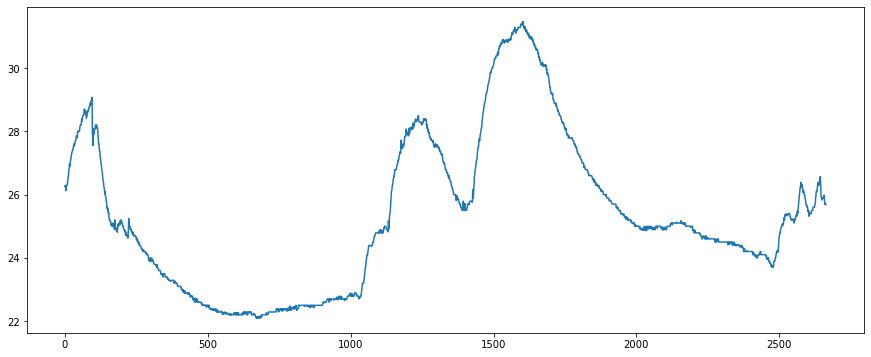

In [54]:
# Without the date index, this does not make the visualization readable and meaningful
# resizing all of the plots: 
# plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(df['Humidity'])

In [55]:
df.index = pd.DatetimeIndex(df['date'], freq='H')
df.index

DatetimeIndex(['2015-02-02 14:00:00', '2015-02-02 15:00:00',
               '2015-02-02 16:00:00', '2015-02-02 17:00:00',
               '2015-02-02 18:00:00', '2015-02-02 19:00:00',
               '2015-02-02 20:00:00', '2015-02-02 21:00:00',
               '2015-02-02 22:00:00', '2015-02-02 23:00:00',
               ...
               '2015-05-24 04:00:00', '2015-05-24 05:00:00',
               '2015-05-24 06:00:00', '2015-05-24 07:00:00',
               '2015-05-24 08:00:00', '2015-05-24 09:00:00',
               '2015-05-24 10:00:00', '2015-05-24 11:00:00',
               '2015-05-24 12:00:00', '2015-05-24 13:00:00'],
              dtype='datetime64[ns]', name='date', length=2664, freq='H')

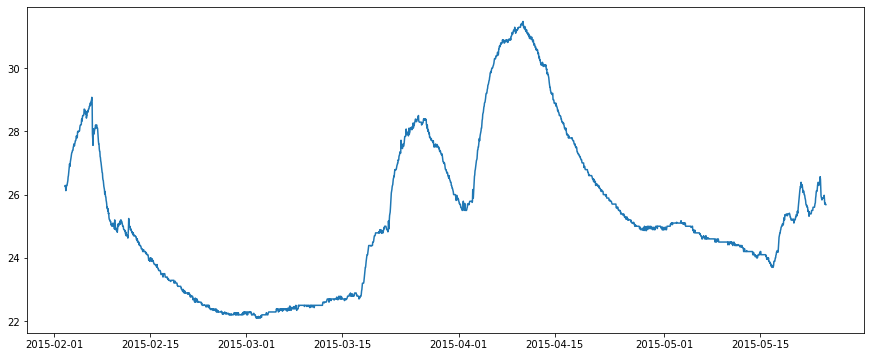

In [56]:
# ploting the graph with time series as index. This makes the graph more readable and meaning
plt.plot(df['Humidity'])
plt.rcParams['figure.figsize']= (15,6) # rcParams to make the graph bigger and lengthy and this applies to everything

In [57]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,,
2015-02-02 14:00:00,2015-02-02 14:00:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 15:00:00,2015-02-02 15:00:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 16:00:00,2015-02-02 16:00:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 17:00:00,2015-02-02 17:00:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 18:00:00,2015-02-02 18:00:00,23.7540,26.200,488.600000,779.000000,0.004767,1


### Changing the frequency of the data (Resampling)

In [58]:
# to know the average temperature in a week. This is similar to groupby, using resample()
df['Humidity'].resample('W').mean()

date
2015-02-08    27.529601
2015-02-15    24.591775
2015-02-22    23.049012
2015-03-01    22.288259
2015-03-08    22.308055
2015-03-15    22.601635
2015-03-22    24.315943
2015-03-29    27.812716
2015-04-05    26.966913
2015-04-12    30.874330
2015-04-19    28.281236
2015-04-26    25.749650
2015-05-03    24.996242
2015-05-10    24.668289
2015-05-17    24.174230
2015-05-24    25.638685
Freq: W-SUN, Name: Humidity, dtype: float64

In [59]:
# this does not make sense though
df['Humidity'].resample('W').sum()

date
2015-02-08    4239.558548
2015-02-15    4131.418202
2015-02-22    3872.234000
2015-03-01    3744.427500
2015-03-08    3747.753167
2015-03-15    3797.074667
2015-03-22    4085.078393
2015-03-29    4672.536333
2015-04-05    4530.441405
2015-04-12    5186.887500
2015-04-19    4751.247667
2015-04-26    4325.941167
2015-05-03    4199.368667
2015-05-10    4144.272571
2015-05-17    4061.270667
2015-05-24    4050.912286
Freq: W-SUN, Name: Humidity, dtype: float64

In [60]:
df['Humidity'].resample('D').mean()

date
2015-02-02    26.269700
2015-02-03    27.136375
2015-02-04    27.938137
2015-02-05    28.545312
2015-02-06    28.470931
                ...    
2015-05-20    25.684042
2015-05-21    25.902774
2015-05-22    25.495139
2015-05-23    26.171085
2015-05-24    25.825214
Freq: D, Name: Humidity, Length: 112, dtype: float64

In [61]:
df['Humidity'].resample('T').mean()
# This shows nan because Pyth



date
2015-02-02 14:00:00    26.272000
2015-02-02 14:01:00          NaN
2015-02-02 14:02:00          NaN
2015-02-02 14:03:00          NaN
2015-02-02 14:04:00          NaN
                         ...    
2015-05-24 12:56:00          NaN
2015-05-24 12:57:00          NaN
2015-05-24 12:58:00          NaN
2015-05-24 12:59:00          NaN
2015-05-24 13:00:00    25.681667
Freq: T, Name: Humidity, Length: 159781, dtype: float64

In [62]:
help(df.resample)

Help on method resample in module pandas.core.generic:

resample(rule, axis=0, closed: Union[str, NoneType] = None, label: Union[str, NoneType] = None, convention: str = 'start', kind: Union[str, NoneType] = None, loffset=None, base: Union[int, NoneType] = None, on=None, level=None, origin: Union[str, ForwardRef('Timestamp'), datetime.datetime, numpy.datetime64, int, numpy.int64, float] = 'start_day', offset: Union[ForwardRef('Timedelta'), datetime.timedelta, numpy.timedelta64, int, numpy.int64, float, str, NoneType] = None) -> 'Resampler' method of pandas.core.frame.DataFrame instance
    Resample time-series data.
    
    Convenience method for frequency conversion and resampling of time
    series. Object must have a datetime-like index (`DatetimeIndex`,
    `PeriodIndex`, or `TimedeltaIndex`), or pass datetime-like values
    to the `on` or `level` keyword.
    
    Parameters
    ----------
    rule : DateOffset, Timedelta or str
        The offset string or object representing t

Options for resampling frequency:
    
- B       business day frequency
- C       custom business day frequency (experimental)
- D       calendar day frequency
- W       weekly frequency
- M       month end frequency
- SM      semi-month end frequency (15th and end of month)
- Q       quarter end frequency
- A       year end frequency
- H       hourly frequency
- T       minutely frequency
- S       secondly frequency
- L       milliseonds
- U       microseconds
- N       nanoseconds
- and more!

In [63]:
df['Humidity'].resample('M').mean()

date
2015-02-28    24.374582
2015-03-31    24.325819
2015-04-30    27.677441
2015-05-31    24.842351
Freq: M, Name: Humidity, dtype: float64

## First Differencing your data
#### Calculating the time difference from the first point in time to the next

In [64]:
df['Humidity'] = df['Humidity'].diff()

In [65]:
df['Humidity_diff'] = df['Humidity'].diff()
print(df)
df.dropna(inplace = True)

                                   date  Temperature  Humidity       Light  \
date                                                                         
2015-02-02 14:00:00 2015-02-02 14:00:00    23.700000       NaN  585.200000   
2015-02-02 15:00:00 2015-02-02 15:00:00    23.718000  0.018000  578.400000   
2015-02-02 16:00:00 2015-02-02 16:00:00    23.730000 -0.060000  572.666667   
2015-02-02 17:00:00 2015-02-02 17:00:00    23.722500 -0.105000  493.750000   
2015-02-02 18:00:00 2015-02-02 18:00:00    23.754000  0.075000  488.600000   
...                                 ...          ...       ...         ...   
2015-05-24 09:00:00 2015-05-24 09:00:00    24.290000 -0.152000  808.000000   
2015-05-24 10:00:00 2015-05-24 10:00:00    24.330000  0.036000  809.800000   
2015-05-24 11:00:00 2015-05-24 11:00:00    24.330000 -0.036000  817.000000   
2015-05-24 12:00:00 2015-05-24 12:00:00    24.356667  0.000000  813.000000   
2015-05-24 13:00:00 2015-05-24 13:00:00    24.408333 -0.018333  

In [66]:
df['Humidity'].resample('D').mean()

date
2015-02-02    0.012500
2015-02-03    0.047917
2015-02-04    0.028438
2015-02-05    0.016563
2015-02-06   -0.021667
                ...   
2015-05-20    0.044125
2015-05-21   -0.032250
2015-05-22    0.009083
2015-05-23    0.004750
2015-05-24   -0.010738
Freq: D, Name: Humidity, Length: 112, dtype: float64

## Decomposing Time Series data

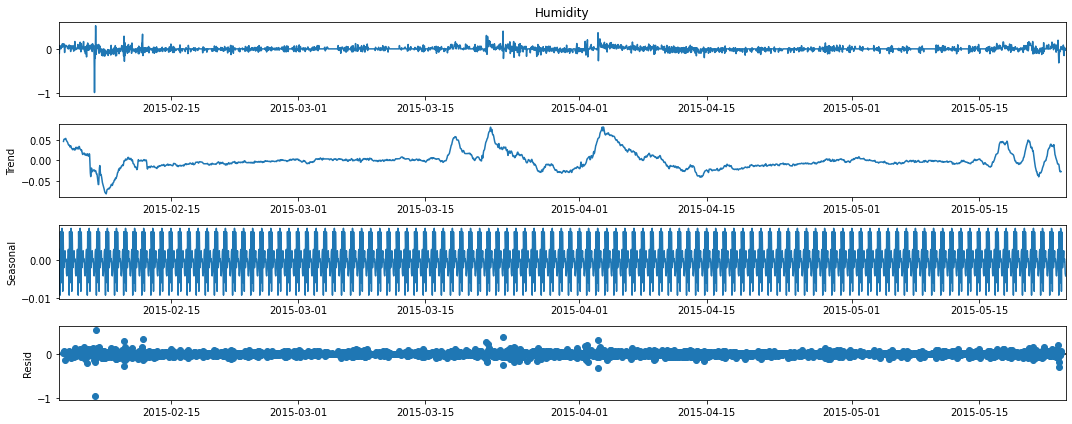

In [67]:
dec = sm.tsa.seasonal_decompose(df['Humidity'])

dec.plot()
plt.show()

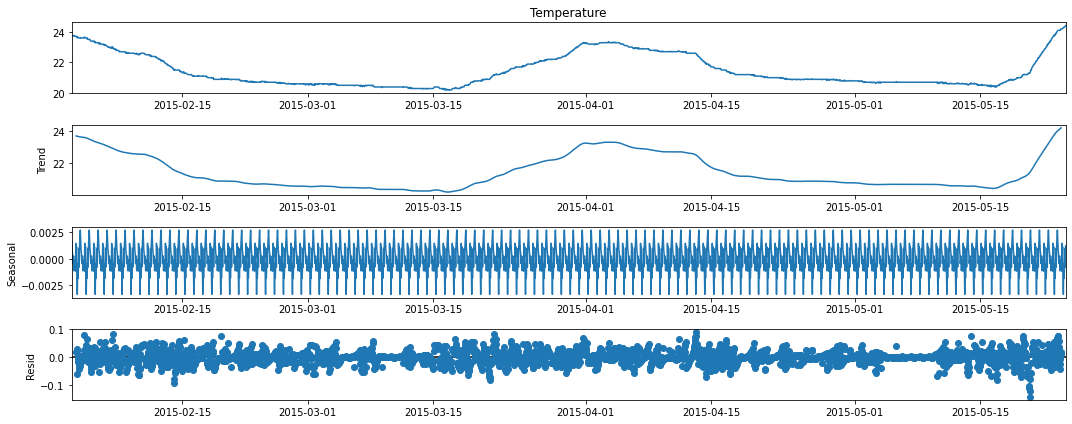

In [68]:
dec = sm.tsa.seasonal_decompose(df['Temperature'])

dec.plot()
plt.show()

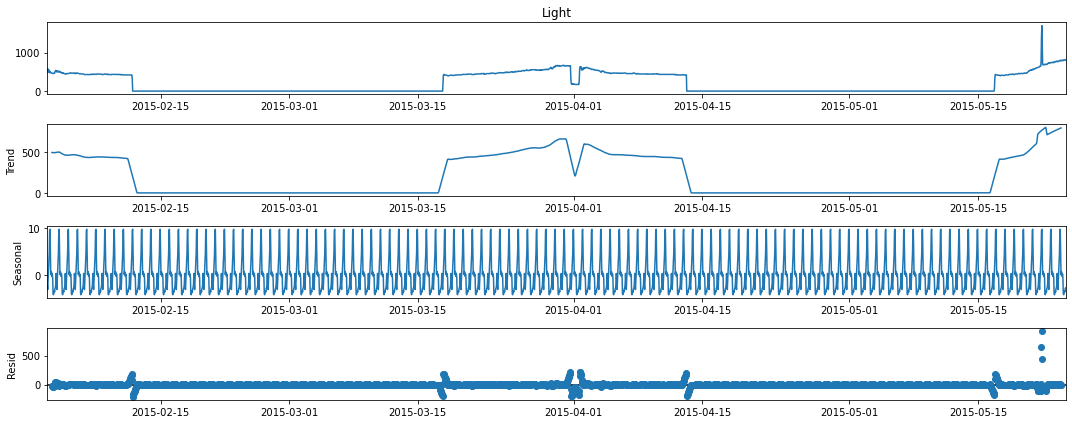

In [69]:
dec = sm.tsa.seasonal_decompose(df['Light'])

dec.plot()
plt.show()

## Checking for autocorrelation

In [76]:
df['Humidity'].autocorr()

0.010011321278076761

In [77]:
df['Humidity'].autocorr(lag)
# lag1: t and t-1
# lag2 = t and t-2

NameError: name 'lag' is not defined

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

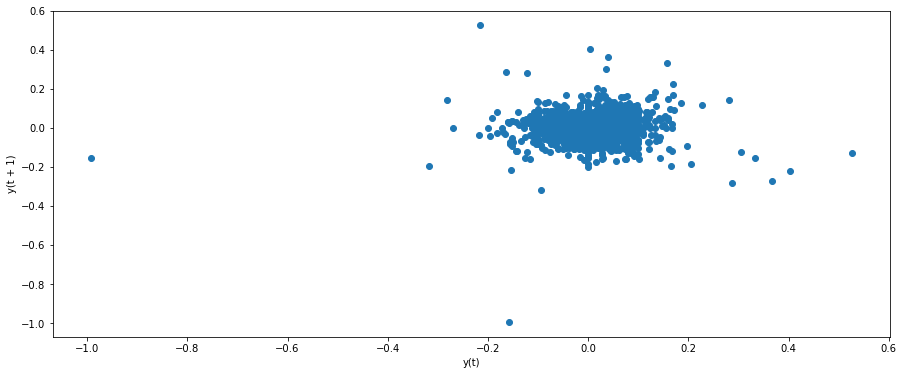

In [75]:
from pandas.plotting import lag_plot
lag_plot(df['Humidity'])
# This has a strong positve correlation

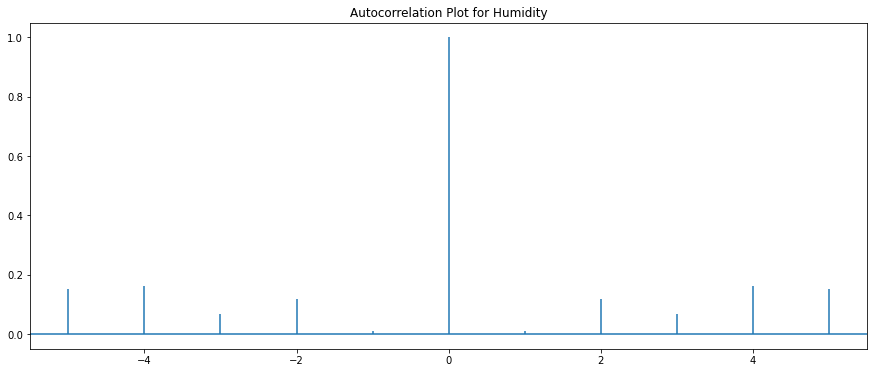

In [73]:
# Autocorrelation Plot

plt.acorr(df['Humidity'], maxlags = 5)
plt.title("Autocorrelation Plot for Humidity")

  
plt.show()  
# The heatmap of autocorrelation

## Applying Time Series models

In [74]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(df['Humidity'], lags = 1).fit()
model.summary()

C:\Users\vicke\anaconda3\envs\kittycat\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 2662
Model:                     AutoReg(1)   Log Likelihood                3897.219
Method:               Conditional MLE   S.D. of innovations              0.056
Date:                Tue, 24 Nov 2020   AIC                             -5.765
Time:                        20:05:50   BIC                             -5.758
Sample:                    02-02-2015   HQIC                            -5.762
                         - 05-24-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -0.0002      0.001     -0.188      0.851      -0.002       0.002
Humidity.L1     0.0100      0.019      0.516      0.606      -0.028       0.048
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           99.9064           +0.0000j           99.9064            0.0000
-----------------------------------------------------------------------------
"""

In [78]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(df['Humidity'], lags = 3).fit()
model.summary()

C:\Users\vicke\anaconda3\envs\kittycat\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 2662
Model:                     AutoReg(3)   Log Likelihood                3920.816
Method:               Conditional MLE   S.D. of innovations              0.055
Date:                Tue, 24 Nov 2020   AIC                             -5.783
Time:                        21:19:17   BIC                             -5.772
Sample:                    02-02-2015   HQIC                            -5.779
                         - 05-24-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -0.0002      0.001     -0.146      0.884      -0.002       0.002
Humidity.L1     0.0012      0.019      0.063      0.950      -0.037       0.039
Humidity.L2     0.1181      0.019      6.151      0.000       0.080       0.156
Humidity.L3     0.0669      0.019      3.460      0.001       0.029       0.105
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9924           -0.0000j            1.9924           -0.0000
AR.2           -1.8790           -1.9938j            2.7397           -0.3703
AR.3           -1.8790           +1.9938j            2.7397            0.3703
-----------------------------------------------------------------------------
"""

In [ ]:
help(AutoReg)

## Making Predictions

In order to assess the accuracy of our predictions, we will remove the last ten observations from the variable which we are using to train the model. Afterwards, we will then predict those ten observations, and see how close we got with our model to what happened in reality!

In [79]:
(train, test) = df.Humidity[:-10], df.Humidity[-10:]

model = AutoReg(df['Humidity'], lags = 1).fit()
model.summary()


C:\Users\vicke\anaconda3\envs\kittycat\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 2662
Model:                     AutoReg(1)   Log Likelihood                3897.219
Method:               Conditional MLE   S.D. of innovations              0.056
Date:                Tue, 24 Nov 2020   AIC                             -5.765
Time:                        21:26:21   BIC                             -5.758
Sample:                    02-02-2015   HQIC                            -5.762
                         - 05-24-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -0.0002      0.001     -0.188      0.851      -0.002       0.002
Humidity.L1     0.0100      0.019      0.516      0.606      -0.028       0.048
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           99.9064           +0.0000j           99.9064            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
pred = model.predict(start=len(train), end=len(train)+10)
pd.DataFrame(zip(test, pred), columns = {'True Values', 'Prediction'})

### Dickey Fuller Test for Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller
help(adfuller)
adfuller(df.Humidity)

In [ ]:
# On First Differences

adfuller(df['Humidity_diff'][1:])

In [ ]:
df['Humidity_diff'].plot()

## MA models

In [ ]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(df['CO2'], order=(0, 1)).fit()
print(model.params)

In [ ]:
(train, test) = df.CO2[:-10], df.CO2[-10:]

model = ARMA(df['CO2'], order=(0, 1)).fit()
pred = model.predict(start=len(train), end=len(train)+10)
pd.DataFrame(zip(test, pred), columns = {'True Values', 'Prediction'})

## ARMA Models

In [ ]:
model = ARMA(df['CO2'], order=(2, 1)).fit()
pred = model.predict(start=len(train), end=len(train)+10)
pd.DataFrame(zip(test, pred), columns = {'True Values', 'Prediction'})

## Extra Pointer

For those who are especially interested in time series:

There is a further class of models called ARIMA models - this stands for Autoregressive Integrated Moving Average

The 'integrated' here refers to the number of times needed to difference a series in order to achieve stationarity.
So an ARMA model is equivalent to an ARIMA model of the same MA and AR orders with no differencing.

ARMA(p,q) is equivalent to ARIMA(p,0,q)


In [ ]:
# Example:

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Humidity'] ,order=(1,0,5)).fit()
model.summary()